<a href="https://colab.research.google.com/github/rheabhutada02/ECL-UNL-Data-Analysis/blob/main/UNLDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install openpyxl
!pip install matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [14]:
excel_file_path = 'Analysis_Ying.xlsx'
df = pd.read_excel(excel_file_path, sheet_name='Pretest')
df2 = pd.read_excel(excel_file_path, sheet_name='PostTest')
df.head()

,2,3,4,5,5_4_TEXT,6,6_7_TEXT,7,7_9_TEXT,8,...,Q59,Q60,Q61,Q62,Q63,Q64,Q65,Q66,Q67,SC0
0,Grade Level in Fall of 2023:,Enter in your ID number:,What is your age?,What gender do you identify as? - Selected Choice,What gender do you identify as? - Other - Text,Ethnicity - please select which ethnicity best...,Ethnicity - please select which ethnicity best...,What is the primary language spoken in your ho...,What is the primary language spoken in your ho...,Mother's highest level of academic achievement:,...,I feel that I can learn how to code.,Consider the following code segment:\n\n\n\nr ...,If addition had higher precedence than multipl...,Consider writing a method whose sole purpose i...,Assume that a program has been run on an input...,Which of the following is not an example of a ...,Consider the following method.\n\n \n\nDEFINE ...,Q1. Which solution to a problem is not best su...,Q2. Consider the following code segment.\ni = ...,Score
1,Senior,1005,17,Male,NaN,White,NaN,English,NaN,Graduate School (masters) diploma,...,Agree,x = 2 * 3.14 * r\ny = x * r\nz = h * x\nsurfac...,70,The return type should be void because the met...,"If the program is run on a different input, th...",Comments included at the end of every line of ...,return 3 * x,A solution that requires looping until a certa...,"j is always equal to 0, which is less than 10;...",5
2,Senior,1006,17,Male,NaN,White,NaN,English,NaN,Graduate School (masters) diploma,...,Strongly Agree,x = 2 * 3.14 * r\ny = x * r\nz = h * x\nsurfac...,70,The return type should be void because the met...,"If the program is run on a different input, th...",Comments included before a loop to say what is...,return 8 * x,A solution that requires looping until a certa...,"j is always equal to 0, which is less than 10;...",6
3,Senior,1029,16,Other,NaN,White,NaN,English,NaN,College Undergraduate diploma,...,Strongly Agree,x = 2 * 3.14 * r\ny = x * r\nz = h * x\nsurfac...,70,The return type should be void because the met...,"If the program is run on a different input, th...",Comments included at the end of every line of ...,return 8 * x,A solution that involves performing the same o...,"j is always equal to 0, which is less than 10;...",6
4,Senior,1024,17,Female,NaN,Asian,NaN,Chinese,NaN,Graduate School (masters) diploma,...,Neutral,x = 2 * 3.14 * r\ny = x * r\nz = h * x\nsurfac...,70,The return type should be void because the met...,None of the above assumptions is valid.,Comments included before a loop to say what is...,return 3 * x,A solution that needs to print all the values ...,"When j is less than 10, print ""Book j"", e.g.,\...",4


In [15]:
# convert columns to strings
new_col = []
for col in df.columns:
    new_col.append(str(col))
df.columns = new_col

In [16]:
for i in range(len(df["7"])):
    if df["7"][i] == "Other (please specify)":
        df["7"][i] = df["7_9_TEXT"][i]

df = df.drop(['5_4_TEXT', '6_7_TEXT', '7_9_TEXT'], axis = 1)
df.head()


,2,3,4,5,6,7,8,9,10,11,...,Q59,Q60,Q61,Q62,Q63,Q64,Q65,Q66,Q67,SC0
0,Grade Level in Fall of 2023:,Enter in your ID number:,What is your age?,What gender do you identify as? - Selected Choice,Ethnicity - please select which ethnicity best...,What is the primary language spoken in your ho...,Mother's highest level of academic achievement:,Father's highest level of academic achievement:,Do you have a family member that works in a Co...,"If yes, please specify the family member (fath...",...,I feel that I can learn how to code.,Consider the following code segment:\n\n\n\nr ...,If addition had higher precedence than multipl...,Consider writing a method whose sole purpose i...,Assume that a program has been run on an input...,Which of the following is not an example of a ...,Consider the following method.\n\n \n\nDEFINE ...,Q1. Which solution to a problem is not best su...,Q2. Consider the following code segment.\ni = ...,Score
1,Senior,1005,17,Male,White,English,Graduate School (masters) diploma,Graduate School (masters) diploma,Yes,Aunt and uncle,...,Agree,x = 2 * 3.14 * r\ny = x * r\nz = h * x\nsurfac...,70,The return type should be void because the met...,"If the program is run on a different input, th...",Comments included at the end of every line of ...,return 3 * x,A solution that requires looping until a certa...,"j is always equal to 0, which is less than 10;...",5
2,Senior,1006,17,Male,White,English,Graduate School (masters) diploma,Some Graduate School,Yes,"Father, Computer Prpgrammer",...,Strongly Agree,x = 2 * 3.14 * r\ny = x * r\nz = h * x\nsurfac...,70,The return type should be void because the met...,"If the program is run on a different input, th...",Comments included before a loop to say what is...,return 8 * x,A solution that requires looping until a certa...,"j is always equal to 0, which is less than 10;...",6
3,Senior,1029,16,Other,White,English,College Undergraduate diploma,College Undergraduate diploma,Yes,"Father, product manager",...,Strongly Agree,x = 2 * 3.14 * r\ny = x * r\nz = h * x\nsurfac...,70,The return type should be void because the met...,"If the program is run on a different input, th...",Comments included at the end of every line of ...,return 8 * x,A solution that involves performing the same o...,"j is always equal to 0, which is less than 10;...",6
4,Senior,1024,17,Female,Asian,Chinese,Graduate School (masters) diploma,Doctorate,Yes,Father - Electrical Engineering; Mother - Comp...,...,Neutral,x = 2 * 3.14 * r\ny = x * r\nz = h * x\nsurfac...,70,The return type should be void because the met...,None of the above assumptions is valid.,Comments included before a loop to say what is...,return 3 * x,A solution that needs to print all the values ...,"When j is less than 10, print ""Book j"", e.g.,\...",4


In [17]:
# Mapping dictionary
mapping = {
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Neutral': 3,
    'Agree': 4,
    'Strongly Agree': 5  # If you have other cases to handle
}

# Function to apply the mapping
def apply_mapping(value):
    return mapping.get(value, value)  # Return the mapped value or original value if not found

# Apply the mapping to the entire dataframe
mapped_df = df.applymap(apply_mapping)

# Print the mapped dataframe
mapped_df.head()

,2,3,4,5,6,7,8,9,10,11,...,Q59,Q60,Q61,Q62,Q63,Q64,Q65,Q66,Q67,SC0
0,Grade Level in Fall of 2023:,Enter in your ID number:,What is your age?,What gender do you identify as? - Selected Choice,Ethnicity - please select which ethnicity best...,What is the primary language spoken in your ho...,Mother's highest level of academic achievement:,Father's highest level of academic achievement:,Do you have a family member that works in a Co...,"If yes, please specify the family member (fath...",...,I feel that I can learn how to code.,Consider the following code segment:\n\n\n\nr ...,If addition had higher precedence than multipl...,Consider writing a method whose sole purpose i...,Assume that a program has been run on an input...,Which of the following is not an example of a ...,Consider the following method.\n\n \n\nDEFINE ...,Q1. Which solution to a problem is not best su...,Q2. Consider the following code segment.\ni = ...,Score
1,Senior,1005,17,Male,White,English,Graduate School (masters) diploma,Graduate School (masters) diploma,Yes,Aunt and uncle,...,4,x = 2 * 3.14 * r\ny = x * r\nz = h * x\nsurfac...,70,The return type should be void because the met...,"If the program is run on a different input, th...",Comments included at the end of every line of ...,return 3 * x,A solution that requires looping until a certa...,"j is always equal to 0, which is less than 10;...",5
2,Senior,1006,17,Male,White,English,Graduate School (masters) diploma,Some Graduate School,Yes,"Father, Computer Prpgrammer",...,5,x = 2 * 3.14 * r\ny = x * r\nz = h * x\nsurfac...,70,The return type should be void because the met...,"If the program is run on a different input, th...",Comments included before a loop to say what is...,return 8 * x,A solution that requires looping until a certa...,"j is always equal to 0, which is less than 10;...",6
3,Senior,1029,16,Other,White,English,College Undergraduate diploma,College Undergraduate diploma,Yes,"Father, product manager",...,5,x = 2 * 3.14 * r\ny = x * r\nz = h * x\nsurfac...,70,The return type should be void because the met...,"If the program is run on a different input, th...",Comments included at the end of every line of ...,return 8 * x,A solution that involves performing the same o...,"j is always equal to 0, which is less than 10;...",6
4,Senior,1024,17,Female,Asian,Chinese,Graduate School (masters) diploma,Doctorate,Yes,Father - Electrical Engineering; Mother - Comp...,...,3,x = 2 * 3.14 * r\ny = x * r\nz = h * x\nsurfac...,70,The return type should be void because the met...,None of the above assumptions is valid.,Comments included before a loop to say what is...,return 3 * x,A solution that needs to print all the values ...,"When j is less than 10, print ""Book j"", e.g.,\...",4
5,Senior,1028,17,Female,White,English,Community College (Associate Degree),College Undergraduate diploma,Yes,"father, IT",...,4,x = 2\ny = x * 3.14 * r * r\nz = x * 3.14 * h\...,70,The return type should be void because the met...,"If the program is run on a different input, th...",Comments included at the end of every line of ...,return 3 * x,A solution that requires looping until a certa...,"j is always equal to 0, which is less than 10;...",5
6,Senior,1023,16,Female,Asian,Kannada,Some Graduate School,Some Graduate School,Yes,Mother and Father,...,5,x = 2 * 3.14 * r\ny = x * r\nz = h * x\nsurfac...,70,The return type should be void because the met...,"If the program is run on a different input, th...",Comments included at the end of every line of ...,return 4 + x,A solution that needs to print all the values ...,"When j is less than 10, print ""Book i"", e.g.,\...",4
7,Senior,1015,17,Male,White,English,Graduate School (masters) diploma,College Undergraduate diploma,Yes,Uncle; Developer,...,5,x = 2 * 3.14 * r\ny = x * r\nz = h * x\nsurfac...,70,The return type should be void because the met...,None of the above assumptions is valid.,Comments included at the end of every line of ...,return 8 * x,A solution that requires looping unt

In [21]:
mapped_df2 = df2.applymap(apply_mapping)
mapped_df2.drop(1,inplace=True)
mapped_df2.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q62,Q63,Q64,Q65,Q66,Q67,Q8.1,Q9.1,Q26.1,SC0
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Consider writing a method whose sole purpose i...,Assume that a program has been run on an input...,Which of the following is not an example of a ...,Consider the following method.\n\n \n\nDEFINE ...,Q1. Which solution to a problem is not best su...,Q2. Consider the following code segment.\ni = ...,"Q3.\n\n\nword = ['E', 'C', 'N', 'E', 'I', 'C',...",Q4. Given the following code segment.\n\n\narr...,Q8.\n\n\n\nx = False\n\ny = True\n\nz = False\...,Score
2,2023-07-28 07:33:08,2023-07-28 07:44:54,IP Address,129.93.161.234,100,705,True,2023-07-28 07:44:55,R_qw7JCLUlDoxCG77,NaN,...,The return type should be void because the met...,"If the program is run on a different input, th...",Comments included at the end of every line of ...,return 4 * x,A solution that requires looping until a certa...,"j is always equal to 0, which is less than 10;...",E!\nCE!\nNCE!\nENCE!\nIENCE!\nCIENCE!\nSCIENCE!,i = 5; odd = 2,/* missing code 1 */ (x AND z) AND (y OR (N...,6
3,2023-07-28 07:33:33,2023-07-28 07:48:56,IP Address,129.93.161.235,100,922,True,2023-07-28 07:48:56,R_2s4J8crA6vQe0l4,NaN,...,The return type should be void because the met...,"If the program is run on a different input, th...",Comments included before a loop to say what is...,return 8 * x,A solution that involves counting a range of n...,"When j is less than 10, print ""Book i"", e.g.,\...",E!\nCE!\nNCE!\nENCE!\nIENCE!\nCIENCE!\nSCIENCE!,i = 5; odd = 3,/* missing code 1 */ (x AND z) OR (z AND y)...,4
4,2023-07-28 07:33:16,2023-07-28 07:49:00,IP Address,129.93.161.239,100,944,True,2023-07-28 07:49:01,R_22qW1LayZm9Ywdv,NaN,...,The return type should be void because the met...,None of the above assumptions is valid.,Comments included before a loop to say what is...,return 4 * x,A solution that requires looping until a certa...,"j is always equal to 0, which is less than 10;...",E\nCE\nNCE\nENCE\nIENCE\nCIENCE\nSCIENCE!,i = 5; odd = 2,/* missing code 1 */ NOT(NOT((y OR x) AND (...,6
5,2023-07-28 07:33:43,2023-07-28 07:49:09,IP Address,129.93.161.234,100,925,True,2023-07-28 07:49:10,R_1g6mVf7YznHsY82,NaN,...,The return type should be void because the met...,None of the above assumptions is valid.,Comments included at the beginning of a method...,return 4 * x,A solution that needs to repeat a known number...,"j is always equal to 0, which is less than 10;...",E\nCE\nNCE\nENCE\nIENCE\nCIENCE\nSCIENCE!,i = 5; odd = 2,/* missing code 1 */ (x AND z) OR (z AND y)...,4


In [19]:
def make_hist(question):
    values = mapped_df[question][1:]
    values2 = mapped_df2[question][1:]
    values.sort_values(inplace=True)
    values2.sort_values(inplace=True)
    plt.hist(values.astype(int), bins=10, alpha=0.7, edgecolor='black', color='blue', label='df1')
    plt.hist(values2.astype(int), bins=10, alpha=0.7, edgecolor='black', color='yellow', label='df2')

    mean_value = np.mean(values)
    print("Mean: ", mean_value)
    std_deviation = np.std(values)
    print("STD: ", std_deviation)
    mean_value2 = np.mean(values2)
    print("Mean: ", mean_value2)
    std_deviation2 = np.std(values2)
    print("STD: ", std_deviation2)

    #Add mean and ± standard deviation lines
    plt.axvline(mean_value, color='red', linestyle='dotted', linewidth=2, label='df1 mean')
    plt.axvline(mean_value - std_deviation, color='green', linestyle='dotted', linewidth=2, label='df1 mean +/- std')
    plt.axvline(mean_value + std_deviation, color='green', linestyle='dotted', linewidth=2)

    plt.axvline(mean_value2, color='red', linestyle='dashed', linewidth=2, label='df2 mean')
    plt.axvline(mean_value2 - std_deviation2, color='green', linestyle='dashed', linewidth=2, label='df2 mean +/- std')
    plt.axvline(mean_value2 + std_deviation2, color='green', linestyle='dashed', linewidth=2)

    plt.title(mapped_df[question][0])
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.legend()
    plt.show()

Histogram for Q1
Mean:  2.064516129032258
STD:  0.5642856672430936
Mean:  2.1481481481481484
STD:  0.9310966733315951


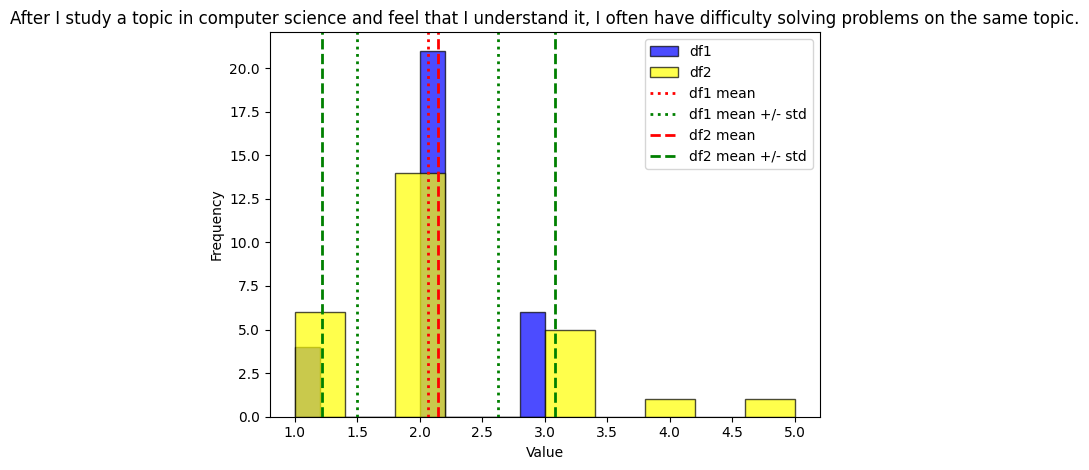

Histogram for Q2
Mean:  1.7741935483870968
STD:  0.7052648744863047
Mean:  1.3333333333333333
STD:  0.6666666666666666


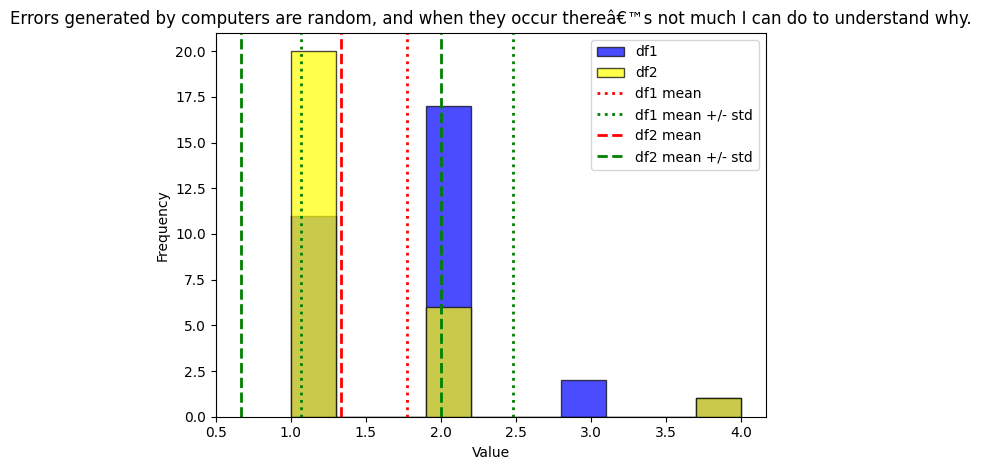

Histogram for Q3
Mean:  2.6451612903225805
STD:  0.968816607592336
Mean:  2.4444444444444446
STD:  1.030402055055078


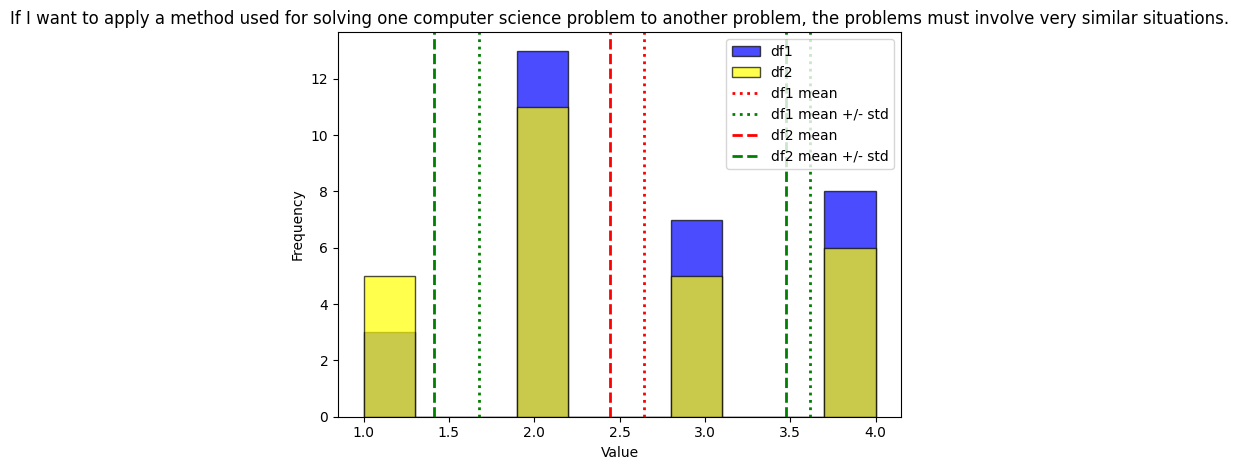

Histogram for Q4
Mean:  3.7419354838709675
STD:  0.914673992177924
Mean:  4.148148148148148
STD:  0.7554102983100421


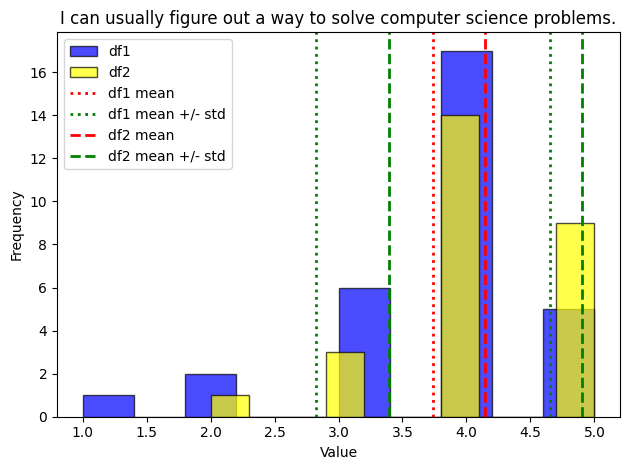

Histogram for Q5
Mean:  3.967741935483871
STD:  0.8224225021923848
Mean:  4.296296296296297
STD:  0.531581484978049


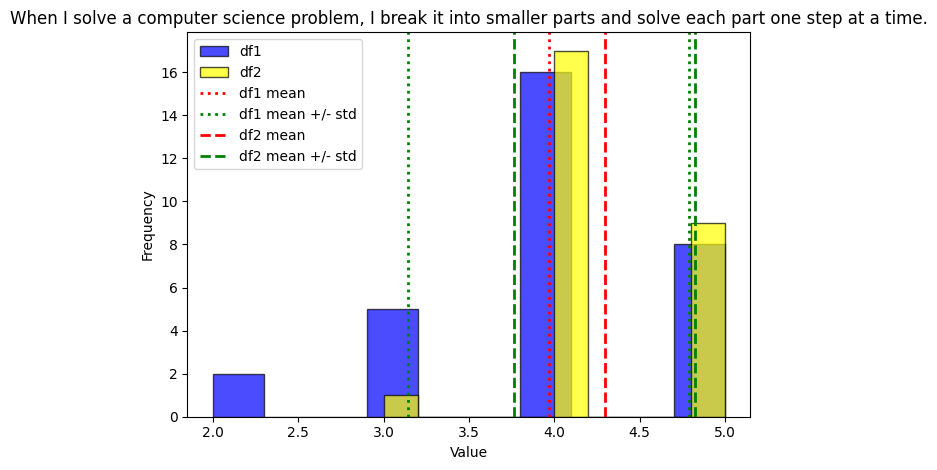

In [20]:
# for i in range(1,60) for the whole thing
for i in range(1,6):
    print('Histogram for Q' + str(i))
    make_hist('Q' + str(i))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c40071dd-bf6c-4d4c-b86e-f994e2235bd0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>